<a href="https://colab.research.google.com/github/HwangHanJae/recommender_system/blob/main/book_Recommender_Systems/Model_Base_CF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 기반 협업 필터링

참고링크1 : https://yamalab.tistory.com/89  
참고링크2 : https://yamalab.tistory.com/92  
참고링크3 : https://lsjsj92.tistory.com/564   
참고링크4 :  https://www.kaggle.com/code/chocozzz/00-sgd-1  
참고링크5 : https://yeong-jin-data-blog.tistory.com/entry/%EC%B6%94%EC%B2%9C-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-Matrix-Factorization


모델 기반 협업 필터링에는 규칙 기반이나 나이브베이즈 등 다른 방법들이 존재하지만  
여기서는 잠재요인 모델에 관하여 다루겠습니다.
잠재요인 모델은 잠재 요인 협업 필터링이라고도 부르며 행렬분해(Matrix Factorization)를 이용합니다.

잠재 요인 모델은 잘 알려진 차원 축소 방법을 활용하여 누락된 아이템(NULL)을 채웁니다.  
차원 축소는 기본 차원의 데이터를 적은 차원으로 표현합니다. 대부분의 차원 축소는 행렬분해(Matrix Factorization)로 표현이 가능합니다.  

$$R = UV^{T}$$

- $R$ : $m × n$
- $U$ : $m × k$
- $V$ : $n × k$ 즉 $V^{T}$ : $k × n$



이때 $R$은 $m×n$이고 $U$는 $m×k$, $V$는 $n×k$로 $V^{T}$는 $k×n$으로 행렬분해됩니다.  
여기서 $U$, $V$의 각 행과 열은 사용자, 아이템 잠재 벡터, 사용자, 아이템 잠재 행렬 혹은 잠재 요인이라고 부릅니다.  
$UV^{T}$를 계산하면 $R$과 굉장히 유사하며 동일한 크기의 행렬이 생성이 됩니다. 이때 행렬이 재생성되면서 빈공간(NULL)이 채워지게 됩니다.

$$\hat{R} ≈ UV^{T}$$


여기서 $U$, $V$의 요소들을 이용해서 예측값을 구하게 됩니다.

$$\hat{r_{ij}} = ∑_{s=1}^{k}u_{is}⋅v_{js}$$

$r_{ij}$는 예측값입니다.

관측값과 예측값의 차이를 줄여서 우리가 예측한 값이 최대한 관측값과 가까워지는 것이 목적입니다.  
아래는 목적함수(cost)를 정의한 것입니다.

$$MinJ(Loss) =\frac{1}{2}∑_{(i,j)∈S}e_{ij}^{2}$$

여기서 $e_{ij}$는 관측값과 예측값의 차이로 $e_{ij} = (r_{ij} - \hat{r_{ij}})$입니다.  
다시 표현하면 $e_{ij} = (r_{ij}-∑_{s=1}^{k}u_{is}⋅v_{js})$입니다.

$$MinJ(Loss)= \frac{1}{2}∑_{(i,j)∈S}(r_{ij}-∑_{s=1}^{k}u_{is}⋅v_{js})^{2}$$

로 표현할 수 있습니다.

그리고 모델이 과적합이 되는 것을 방지하기 위하여 위의 목적함수에 정규화 과정을 추가합니다.
추가하는 정규화 항은 다음과 같습니다.

$$\frac{λ}{2}(||U||^{2} + ||V||^{2})$$

결과적으로 구해야하는 목적함수는 아래와 같습니다.

$$MinJ(Loss)= \frac{1}{2}∑_{(i,j)∈S}(r_{ij}-∑_{s=1}^{k}u_{is}⋅v_{js})^{2} + \frac{λ}{2}(||U||^{2} + ||V||^{2})$$



## SGD(확률적 경사하강법)

위에서 언급했듯이 예측값이 관측값과 가까워지도록 하는 것이 목적입니다.
$u_{is}$, $v_{js}$를 목적함수가 최소화되도록 학습하여 구할 수 있습니다.  
목적함수가 최소화가 되었다는 것은 기울기가 0에 가장 가깝다는 의미이고 편미분을 사용하여 기울기를 구할 수 있습니다.   
$u_{ij}$, $v_{ij}$에 대한 $J$의 편미분을 계산하면 식은 아래와 같습니다.

$$\frac{∂J}{∂u_{ij}} = ∑_{j:(i,j)∈S}(r_{ij}-∑_{s=1}^{k}u_{is}⋅v_{js})(-v_{jq})+λu_{iq}$$

$$=\frac{∂J}{∂u_{ij}} = ∑_{j:(i,j)∈S}(e_{ij})(-v_{jq})+λu_{iq}$$

$$\frac{∂J}{∂v_{ij}} = ∑_{j:(i,j)∈S}(r_{ij}-∑_{s=1}^{k}u_{is}⋅v_{js})(-u_{iq})+λv_{jq}$$

$$=\frac{∂J}{∂v_{ij}} = ∑_{j:(i,j)∈S}(e_{ij})(-u_{iq})+λv_{jq}$$


기울기를 구했으면 기울기가 0에 가까워지게 기울기를 이용하여 값을 갱신할 수 있습니다. 이때 $α$가 등장하는데 learning rate(학습률)이라고 하며 경사하강법에서 기울기를 통하여 최적화가 될때 얼만큼의 보폭으로 내려갈지 결정해주는 step size에 해당합니다.

$$u_{iq} ⇐ u_{iq} - α ⋅ [\frac{∂J}{∂u_{iq}}]$$


$$v_{jq} ⇐ v_{jq} - α⋅ [\frac{∂J}{∂v_{iq}}]$$

효율을 높이기 위하여 사용자 $i$ 및 아이템 $j$에 대하여 $k$차원의 잠재 벡터에 대해 벡터화된 형태로 수식을 다시 작성하면 아래와 같습니다.

$$\overline{u_{i}} ⇐ \overline{u_{i}} + α(e_{ij}\overline{v_{j}}-λ\overline{u_{i}})$$


$$\overline{v_{j}} ⇐ \overline{v_{j}} + α(e_{ij}\overline{u_{i}}-λ\overline{v_{j}})$$

그리고 사용자 기반 협업 필터링에서도 볼 수 있듯이 사용자의 평가 경향을 고려할 수 있습니다. 아래와 같은 방식으로 계산하는 것이 더 정확합니다.

$$\hat{r_{ij}} = b + b_{ui}+b_{vj} + ∑_{s=1}^{k}u_{is}v_{js}$$

- $b_{ui}$ : 사용자의 bias  
- $b_{vj}$ : 아이템의 bias
- $b$  : 전체 평균(고정된 값)
- $\sum$(시그마부분) : 경사하강법으로 계산한 값

사용자의 bias($b_{ui}$)와 아이템의 bias($b_{vj}$)는 각각 다음과 같이 구할 수 있습니다.
이때 β는 정규화 계수를 사용합니다.
$$b_{ui} = b_{ui} + α × (e_{ij} - βb_{ui})$$

$$b_{vj} = b_{vj} + α × (e_{ij} - βb_{vj})$$



### 간단한 경사하강법 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.random.rand(100)
Y = 0.2 * X + 0.5

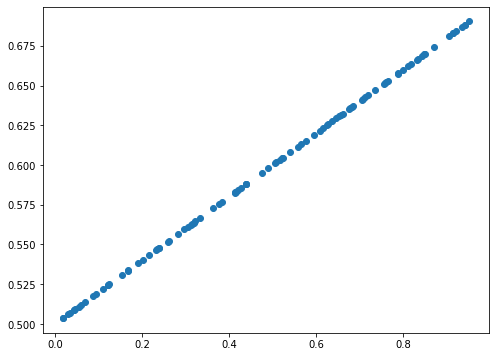

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y)
plt.show()

In [ ]:
def plot_prediction(pred, y):
  plt.figure(figsize=(8,6))
  plt.scatter(X, y)
  plt.scatter(X, pred)
  plt.show()


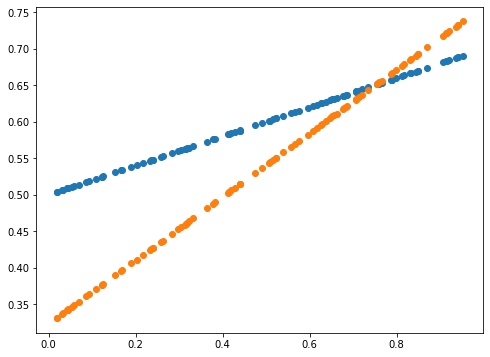

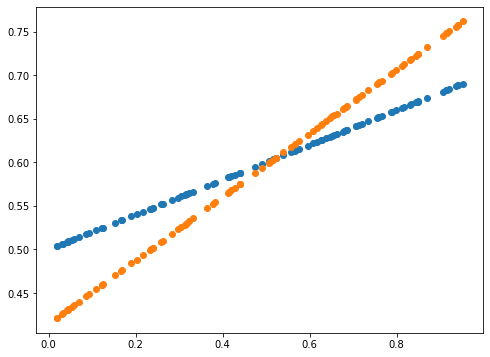

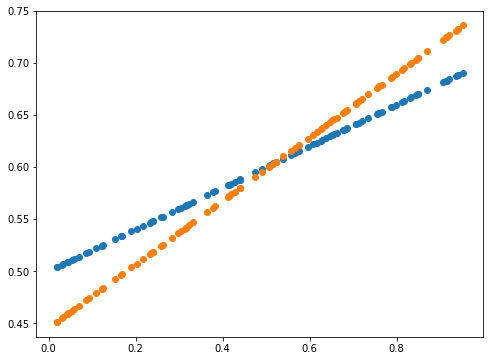

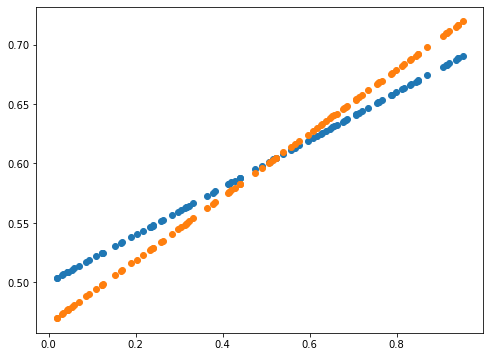

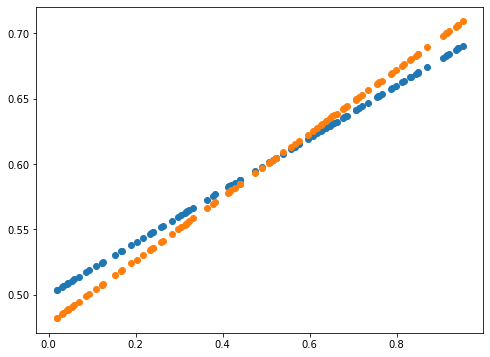

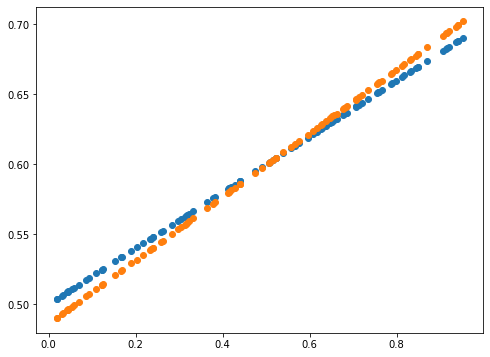

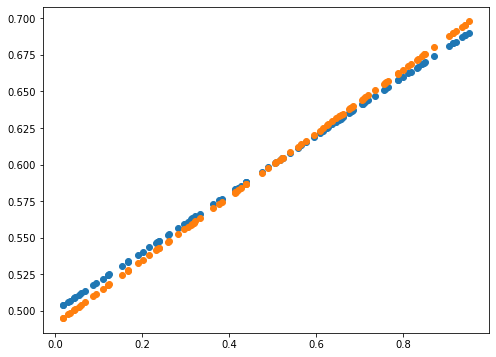

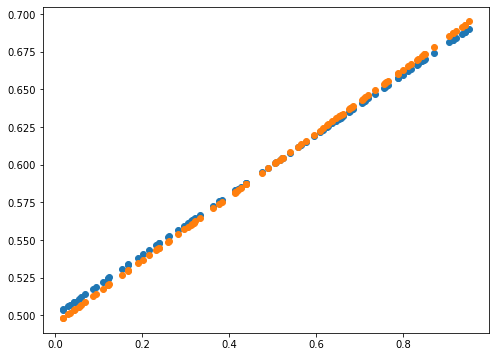

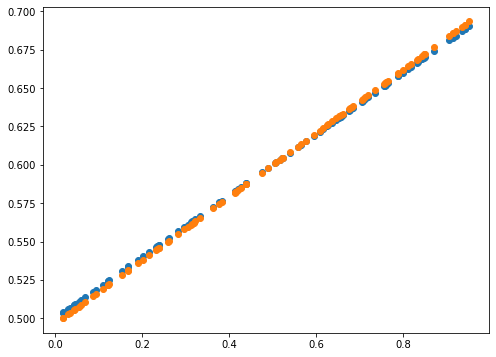

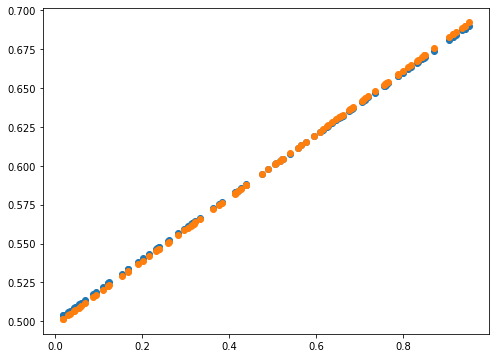

In [ ]:
W = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
learning_rate = 0.7
for epoch in range(200):
  Y_Pred = W * X + b
  #mae
  error = np.abs(Y_Pred - Y).mean()
  if error < 0.001:
    break
  
  # gradient descent
  w_grad = learning_rate * ((Y_Pred - Y) * X).mean()
  b_grad = learning_rate * (Y_Pred - Y).mean()

  #
  W= W - w_grad
  b = b - b_grad
  if epoch % 10 == 0:
    Y_pred = W * X + b
    plot_prediction(Y_pred, Y)


위의 그래프를 보면 epoch가 늘어날수록(반복할수록) 예측값이 점점 관측값에 근사해지는 것을 확인할 수 있습니다.

### SGD 방법

아래는 행렬분해(Matrix Factorization)를 이용하여 SGD를 구현한 파이썬 코드입니다.  


In [5]:
import numpy as np


class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        R : 평점 행렬
        k : User, Item Latent의 차원의 수
        learning_rate : 학습률
        reg_param : 정규화 계수
        epochs : 전체 학습 횟수
        verbose : 학습 과정 출력 여부
        """

        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        행렬분해(MatrixFactorization), 경사하강법(SGD)를 활용하여 weight(가중치)와 bias를 업데이트 하는 함수
        
        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._U = np.random.normal(size=(self._num_users, self._k))
        self._V = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_U = np.zeros(self._num_users)
        self._b_V = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):
          #rating에 존재하는 index를 기준으로 학습(training)
          xi, yi = self._R.nonzero()
          for i , j in zip(xi, yi):
              self.gradient_descent(i, j, self._R[i, j])
          cost = self.cost()
          self._training_process.append((epoch, cost))

          # print status
          if self._verbose == True and ((epoch + 1) % 10 == 0):
              print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))

    def gradient_descent(self, i, j, rating):
        """
        경사하강법을 수행하는 함수

        i: user index of matrix
        j: item index of matrix
        rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_U[i] += self._learning_rate * (error - self._reg_param * self._b_U[i])
        self._b_V[j] += self._learning_rate * (error - self._reg_param * self._b_V[j])

        # update latent feature
        du, dv = self.gradient(error, i, j)
        self._U[i, :] += self._learning_rate * du
        self._V[j, :] += self._learning_rate * dv

    def get_prediction(self, i, j):
        """
        Error를 구하기 위하여 예측값을 구하는 함수
        :return: prediction of r_ij
        """
        return self._b + self._b_U[i] + self._b_V[j] + self._U[i, :].dot(self._V[j, :].T)

    def gradient(self, error, i, j):
        """
        경사하강법을 위하여 잠재벡터(Latent)의 편미분값을 계산하여 반환하는 함수

        error: rating - prediction error
        i: user index
        j: item index

        :return: gradient of latent feature tuple
        """

        du = (error * self._V[j, :]) - (self._reg_param * self._U[i, :])
        dv = (error * self._U[i, :]) - (self._reg_param * self._V[j, :])
        return du, dv
    def cost(self):
        """
        rmse를 계산하는 함수
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - predicted[x, y], 2)
        return np.sqrt(cost / len(xi))

    def get_complete_matrix(self):
        """
        학습(fit)한 최종 Matrix를 계산하여 반환하는 함수

        - UXV 행렬에 b_U[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_V[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_U[:, np.newaxis] + self._b_V[np.newaxis:, ] + self._U.dot(self._V.T)


    def print_results(self):
        """
        print fit results
        """

        print("User Latent U:")
        print(self._U)
        print("Item Latent V:")
        print(self._V.T)
        print("U x V:")
        print(self._U.dot(self._V.T))
        print("bias:")
        print(self._b)
        print("User Latent bias:")
        print(self._b_U)
        print("Item Latent bias:")
        print(self._b_V)
        print("Final R matrix:")
        print(self.get_complete_matrix())
        print("Final RMSE:")
        print(self._training_process[self._epochs-1][1])





In [6]:
# rating matrix - User X Item : (7 X 5)
R = np.array([
    [1, 0, 0, 1, 3],
    [2, 0, 3, 1, 1],
    [1, 2, 0, 5, 0],
    [1, 0, 0, 4, 4],
    [2, 1, 5, 4, 0],
    [5, 1, 5, 4, 0],
    [0, 0, 0, 1, 0],
])

# P, Q is (7 X k), (k X 5) matrix
factorizer = MatrixFactorization(R, k=3, learning_rate=0.01, reg_param=0.01, epochs=300, verbose=True)
factorizer.fit()
factorizer.print_results()

Iteration: 10 ; cost = 0.9623
Iteration: 20 ; cost = 0.6388
Iteration: 30 ; cost = 0.4559
Iteration: 40 ; cost = 0.3416
Iteration: 50 ; cost = 0.2698
Iteration: 60 ; cost = 0.2246
Iteration: 70 ; cost = 0.1947
Iteration: 80 ; cost = 0.1733
Iteration: 90 ; cost = 0.1566
Iteration: 100 ; cost = 0.1426
Iteration: 110 ; cost = 0.1305
Iteration: 120 ; cost = 0.1196
Iteration: 130 ; cost = 0.1098
Iteration: 140 ; cost = 0.1009
Iteration: 150 ; cost = 0.0928
Iteration: 160 ; cost = 0.0853
Iteration: 170 ; cost = 0.0786
Iteration: 180 ; cost = 0.0724
Iteration: 190 ; cost = 0.0668
Iteration: 200 ; cost = 0.0617
Iteration: 210 ; cost = 0.0571
Iteration: 220 ; cost = 0.0529
Iteration: 230 ; cost = 0.0492
Iteration: 240 ; cost = 0.0458
Iteration: 250 ; cost = 0.0427
Iteration: 260 ; cost = 0.0400
Iteration: 270 ; cost = 0.0376
Iteration: 280 ; cost = 0.0354
Iteration: 290 ; cost = 0.0334
Iteration: 300 ; cost = 0.0317
User Latent U:
[[ 0.05335094  0.57989224 -1.17968765]
 [-0.25723068 -0.66386742

In [ ]:
class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """

        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose

- R : 입력으로 들어오는 평점행렬
- _num_users : 유저의 크기
- _num_items : 아이템의 크기
- _learing_rate : 학습률(알파)
- _reg_param : 정규화 계수
- _epochs : 전체 학습 횟수
- verbose : 학습 과정을 출력할지 여부

In [ ]:
def fit(self):
    """
    행렬분해(MatrixFactorization), 경사하강법(SGD)를 활용하여 weight(가중치)와 bias를 업데이트 하는 함수
    
    참고: self._b에 대한 설명
    - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
    - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

    :return: training_process
    """

    # init latent features
    self._U = np.random.normal(size=(self._num_users, self._k))
    self._V = np.random.normal(size=(self._num_items, self._k))

    # init biases
    self._b_U = np.zeros(self._num_users)
    self._b_V = np.zeros(self._num_items)
    self._b = np.mean(self._R[np.where(self._R != 0)])

    # train while epochs
    self._training_process = []
    for epoch in range(self._epochs):

        # rating이 존재하는 index를 기준으로 training
        for i in range(self._num_users):
            for j in range(self._num_items):
                if self._R[i, j] > 0:
                    self.gradient_descent(i, j, self._R[i, j])
        cost = self.cost()
        self._training_process.append((epoch, cost))

        # print status
        if self._verbose == True and ((epoch + 1) % 10 == 0):
            print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))

`fit`함수는 SGD를 이용하여 Latent Matrix를 초기화하고 학습하는 함수입니다.


```python
    # init latent features
    self._U = np.random.normal(size=(self._num_users, self._k))
    self._V = np.random.normal(size=(self._num_items, self._k))

    # init biases
    self._b_U = np.zeros(self._num_users)
    self._b_V = np.zeros(self._num_items)
    self._b = np.mean(self._R[np.where(self._R != 0)])
```
`self._U`, `self._V` : `np.random.normal(size=(self._num_users, self._k)`크기로 각 행렬을 정규본포 형태로 초기화 해줍니다.

`self._b_U`, `self_b_V` : 사용자, 아이템 bias를 `np.zeros()`함수를 사용하여 각각 `self._num_users`, `self._num_items`만큼 0값을 가지는 벡터를 생성해줍니다.

`self._b` : `np.mean(self.R[np.where(self.R != 0)])`함수로 평점행렬(R)에서 0이 아닌 값들을 찾아 전체 평점의 평균을 계산해줍니다.


```python
  # train while epochs
  self._training_process = []
  for epoch in range(self._epochs):
    #rating에 존재하는 index를 기준으로 학습(training)
    xi, yi = self._R.nonzero()
    for i , j in zip(xi, yi):
        self.gradient_descent(i, j, self._R[i, j])
    cost = self.cost()
    self._training_process.append((epoch, cost))

    # print status
    if self._verbose == True and ((epoch + 1) % 10 == 0):
        print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))
```
`self.training_process` : (epoch, cost)를 저장하는 리스트입니다. 리스트를 활용하여 최종 RMSE를 출력할 수 있습니다.

가장 먼저 `xi, yi = self.R.nonzero()`로 평점 행렬(R)에서 0이 아닌 부분(사용자가 평점을 매긴 부분)에 대해서만 값을 추출하라는 의미입니다.
- 결측치가 아닌 부분을 통해서만 학습을 진행하려는 의도입니다.

이후에 해당 부분을 통하여 모든 평점에 대해서 경사하강법을 실행해줍니다.




In [ ]:
def gradient_descent(self, i, j, rating):
    """
    경사하강법을 수행하는 함수

    i: user index of matrix
    j: item index of matrix
    rating: rating of (i,j)
    """

    # get error
    prediction = self.get_prediction(i, j)
    error = rating - prediction

    # update biases
    self._b_U[i] += self._learning_rate * (error - self._reg_param * self._b_U[i])
    self._b_V[j] += self._learning_rate * (error - self._reg_param * self._b_V[j])

    # update latent feature
    du, dv = self.gradient(error, i, j)
    self._U[i, :] += self._learning_rate * du
    self._V[j, :] += self._learning_rate * dv

gradient_descent함수의 경우 행렬의 원소 위치(i, j)와 평점(rating)을 받습니다. 

$$\overline{u_{i}} ⇐ \overline{u_{i}} + α(e_{ij}\overline{v_{j}}-λ\overline{u_{i}})$$


$$\overline{v_{j}} ⇐ \overline{v_{j}} + α(e_{ij}\overline{u_{i}}-λ\overline{v_{j}})$$

코드에 대한 설명 

링크1 : https://my-develop-note.tistory.com/171  
링크2 : https://my-develop-note.tistory.com/172